# The Sparks foundation : Data Science and Business Analytics GRIP Internship

# Task1:Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of student on the basis of the number of study hours he/she studied using Linear Regression Supervised Machine Learning algorithm.

# Steps:

step1:Importing the dataset.
step2:Visualizing the dataset.
step3:Data preparation.
step4:Training the algorithm.
step5:Visualizing the model.
step6:Making predictions.
step7:Evaluating the model.

# AUTHOR :HYDERABOENI ANUSHA



In [32]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")



In [33]:
#Reading daat from the remoteblink
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [34]:
#now lets observe the data set
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [36]:
#to find the number of coloumns and rows
df.shape

(25, 2)

In [37]:
#To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
#now will check if our dataset contain any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Step 2:Visualizing the dataset
In this will plot dataset to check if we can observe any relation between the two variables or not


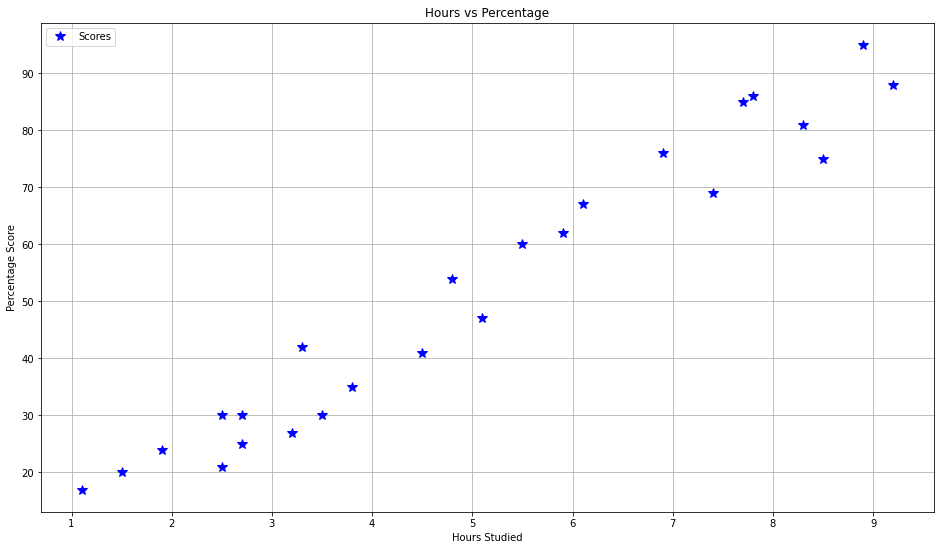

In [40]:
#plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours',y='Scores',style='*',color='blue',markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()
#THROUGH THHIS GRAPH WE CAN CHECK THE LINEAR RELATIONSHIP BETWEEN "HOURS STUDIED" AND "PERCENTAGE SCORE".

In [41]:
#we can also use .corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [42]:
#data PREPERATION in this step we will divide data into "features"(inputs)and "labels"(outputs).After the whole dataSet 
#is been divided into two parts-testing data and training data.
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [44]:
#USING THIS ILOC FUNCTION WE CAN DIVIDE OUR DATA SET
x=df.iloc[:,:-1]
y=df.iloc[:,1:]

In [45]:
x


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [46]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [47]:
#NOW LETS SPLIT THE DATA INTO TRAINING DATA AND TESTING DATA WHICH DIVIDE THE DATA INTO 80 AND 20% RATIO,THIS
#THIA RANDOM STATE IS USED TO PICK UP THE VALUES RANDOMLY FROM A DATA SET.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
#Training the Algorithm
#THROUGH SKLEARN LIB WE WILL STORE LINEAR REGRESSION INTO MODEL
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)#FITTING THE MODEL

LinearRegression()

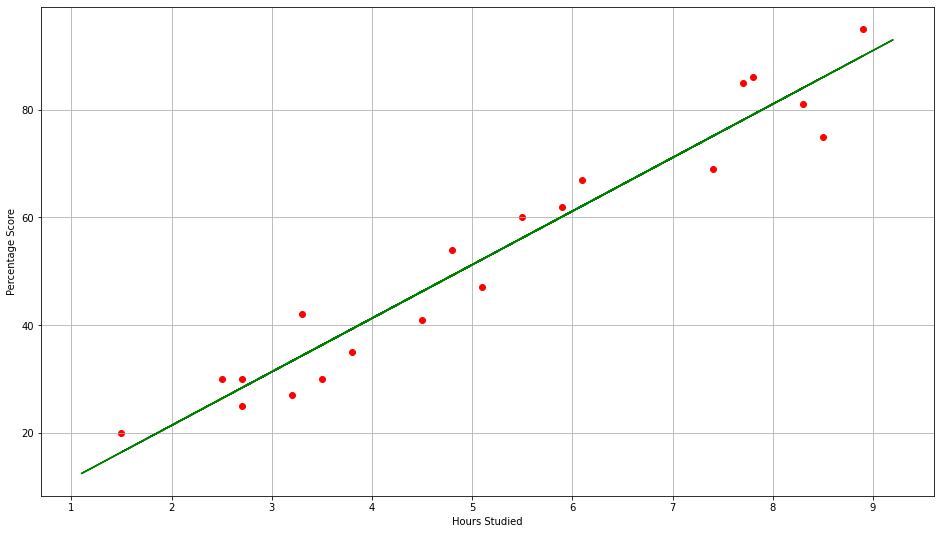

In [108]:
#step-5:Visualizing the data model
#THIS GREEN LINE IS THE BEST FIT LINE
line = model.coef_*x + model.intercept_

#plotting for the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train,y_train ,color='red')
plt.plot(x,line,color ='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


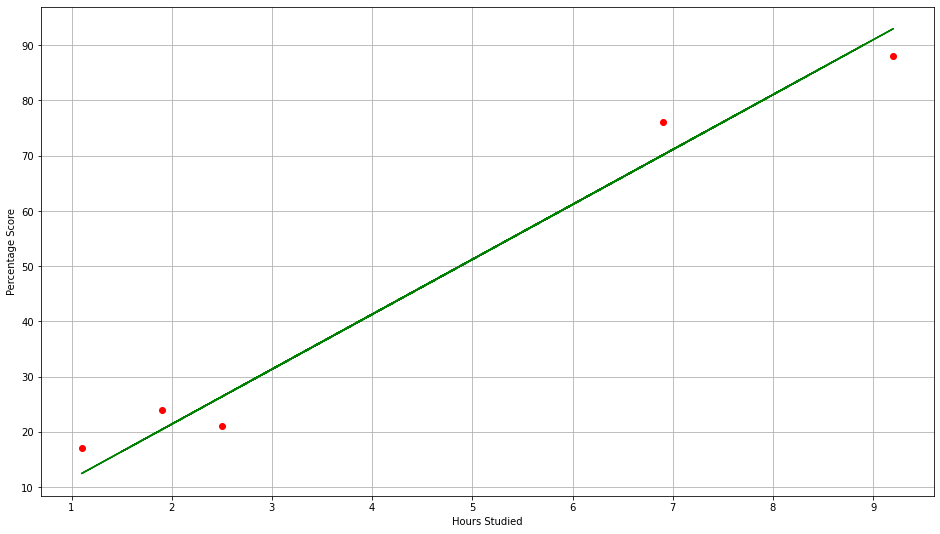

In [49]:
#NOW LETS FIT THE ABOVE BESTFIT LINE IN THE TEST DATA SET WHICH GIVE US QUITE GOOD PREDICTIONS.
line=model.coef_*x + model.intercept_
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test,y_test ,color='red')
plt.plot(x,line,color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [50]:
#step-6:Making predictions(Testing data in hours,predicting the scores)
#FOR THI S WE USE .PREDICT METHOD AND APPLY IT ON X_TEST
print(x_test)
y_pred=model.predict(x_test)


    Hours
14    1.1
0     2.5
17    1.9
6     9.2
23    6.9


In [51]:
#Comparing Actual Vs Predicted
y_test

,Scores
14,17
0,21
17,24
6,88
23,76


In [52]:
y_pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [53]:
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,Scores 14 17 0 21 17 24 6 ...,"[[12.442587140279223], [26.359448340673122], [..."


In [54]:
#LETS test with the OWN data
hours = 9.5
own_pred = model.predict([[hours]])
print("The predicted score if the student studies for",hours,"hours is",own_pred[0])

The predicted score if the student studies for 9.5 hours is [95.94375434]


In [55]:
#step-7:Evaluating the model
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.877039354964484


In [56]:
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test,y_pred))

In [57]:
rmse

4.938382360637607

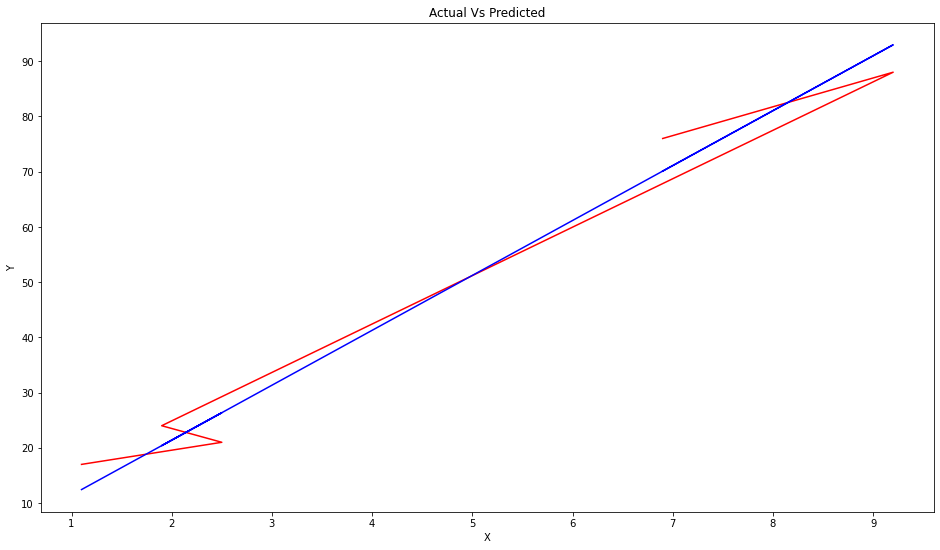

In [58]:
plt.plot(x_test, y_test, color = 'red')
plt.plot(x_test, model.predict(x_test), color = 'blue')
plt.title('Actual Vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [119]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25
